# Visualización funciones de activación 
Bibliografía consultada a fecha de 9-02-2022: 
- Uso de notebook: https://datatofish.com/add-julia-to-jupyter/
- Cómo visualizar funciones en julia: https://docs.juliaplots.org/latest/tutorial/ 
- Definir funciones: https://docs.julialang.org/en/v1/manual/functions/
- Sobre tipos: https://docs.julialang.org/en/v1/manual/types/

In [4]:
# Paquetes
using Plots

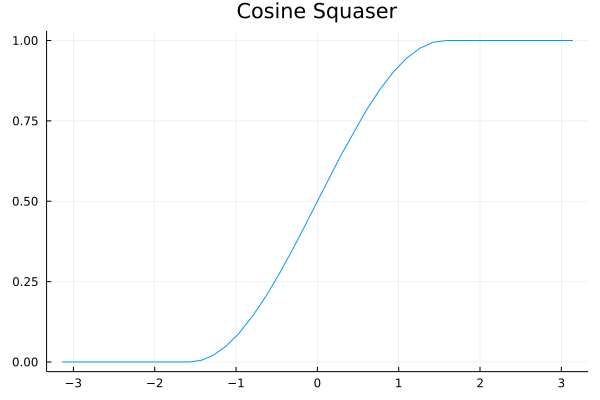

In [26]:
function CosineSquaser(x::Real) :: Real
    salida = 1
    if x < - pi/2 
        salida =  0
    elseif x <=  pi/2 
        salida =  1/2 * (1 + cos( x + 3* pi /2))
    end
    return salida
end

plot( CosineSquaser, -pi, pi, title="Cosine Squaser", label="")